In [9]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("../figure.mplstyle")

## baseline_and_longer

In [10]:
# load data

digits_13 = pd.read_csv("data/wandb_1-3_digits.csv")
digits_13_ut = pd.read_csv("data/wandb_1-3_digits_ut_3steps.csv")
digits_17 = pd.read_csv("data/wandb_1-7_digits.csv")
digits_17_ut = pd.read_csv("data/wandb_1-7_digits_ut_3steps.csv")
digits_119 = pd.read_csv("data/wandb_1-19_digits.csv")

# set Step as index
digits_13.set_index("Step", inplace=True)
digits_13_ut.set_index("Step", inplace=True)
digits_17.set_index("Step", inplace=True)
digits_17_ut.set_index("Step", inplace=True)
digits_119.set_index("Step", inplace=True)

for df in [digits_13, digits_13_ut, digits_17, digits_17_ut, digits_119]:
    df.rename(mapper=lambda x: x.split(" - ")[-1], axis=1, inplace=True)

In [11]:
digits_119.columns

Index(['test_acc_in_dist', 'test_acc_in_dist__MIN', 'test_acc_in_dist__MAX',
       'test_acc_ood_18digit', 'test_acc_ood_18digit__MIN',
       'test_acc_ood_18digit__MAX', 'test_acc_ood_20digit',
       'test_acc_ood_20digit__MIN', 'test_acc_ood_20digit__MAX'],
      dtype='object')

/var/folders/w4/ynsxgc_j27s656r6t6f28pg00000gn/T/ipykernel_83198/1258534448.py:41: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  axs[1].legend(["1-7", "_a", "_a", "_a", "_a", "8"], loc="best", frameon=False)


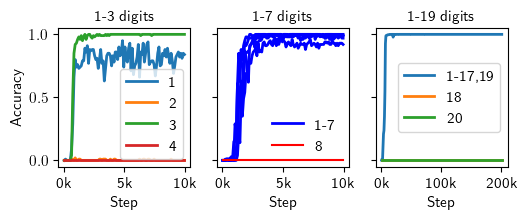

In [12]:
# 3 subplots, 5.8 x 3
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(5.8, 1.8))

# first subplot: 1-3 digits (decoder-only)
# columns: test_acc_1digit, test_acc_2digit, test_acc_3digit, test_acc_4digit
digits_13[
    ["test_acc_1digit", "test_acc_2digit", "test_acc_3digit", "test_acc_4digit"]
].plot(ax=axs[0], title="1-3 digits", legend=False, linewidth=2)
axs[0].set_xlabel("Step")
axs[0].set_ylabel("Accuracy")
axs[0].set_ylim(-0.05, 1.05)
# xtick labels are too crowded
axs[0].set_xticks(range(0, 10001, 5000))
# use k for thousands in xtick labels
axs[0].set_xticklabels([f"{x//1000}k" for x in range(0, 10001, 5000)])
# add legend
axs[0].legend(["1", "2", "3", "4"])

# Plot 1-7 digits as a single blue line group
lines17 = digits_17[
    [
        "test_acc_1digit",
        "test_acc_2digit",
        "test_acc_3digit",
        "test_acc_4digit",
        "test_acc_5digit",
        # "test_acc_6digit",
        # "test_acc_7digit",
    ]
].plot(ax=axs[1], title="1-7 digits", color="blue", legend=False, linewidth=2)

# Plot 8th digit separately in red
line8 = digits_17["test_acc_8digit"].plot(ax=axs[1], color="red", legend=False)

# Set x-axis label and xticks
axs[1].set_xlabel("Step")
axs[1].set_xticks(range(0, 10001, 5000))
axs[1].set_xticklabels([f"{x//1000}k" for x in range(0, 10001, 5000)])

# Customize the legend to combine 1-7 digits under one label
axs[1].legend(["1-7", "_a", "_a", "_a", "_a", "8"], loc="best", frameon=False)
# remove entries 1-4 from the legend

# third subplot: 1-19 digits
# columns: test_acc_1digit, test_acc_2digit, test_acc_3digit, test_acc_4digit, test_acc_5digit, test_acc_6digit, test_acc_7digit, test_acc_8digit, test_acc_9digit, test_acc_10digit, test_acc_11digit, test_acc_12digit, test_acc_13digit, test_acc_14digit, test_acc_15digit, test_acc_16digit, test_acc_17digit, test_acc_18digit, test_acc_19digit
digits_119[["test_acc_in_dist", "test_acc_ood_18digit", "test_acc_ood_20digit"]].plot(
    ax=axs[2], title="1-19 digits", legend=False, linewidth=2
)
axs[2].set_xlabel("Step")
# xtick labels are too crowded
axs[2].set_xticks(range(0, 200001, 100000))
# use k for thousands in xtick labels
axs[2].set_xticklabels([f"{x//1000}k" for x in range(0, 200001, 100000)])
# add legend
axs[2].legend(["1-17,19", "18", "20"], loc="center right")

# save figure
# plt.tight_layout()
plt.savefig("../latex/fig/baseline_and_longer.png", dpi=300)

/var/folders/w4/ynsxgc_j27s656r6t6f28pg00000gn/T/ipykernel_83198/1876754683.py:41: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  axs[1].legend(["1-7", "_a", "_a", "_a", "_a", "8"], loc="best", frameon=False)


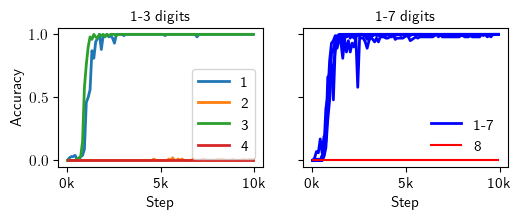

In [14]:
# similar plot but 2 subplots, for universal transformer
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(5.8, 1.8))

# first subplot: 1-3 digits (decoder-only)
# columns: test_acc_1digit, test_acc_2digit, test_acc_3digit, test_acc_4digit
digits_13_ut[
    ["test_acc_1digit", "test_acc_2digit", "test_acc_3digit", "test_acc_4digit"]
].plot(ax=axs[0], title="1-3 digits", legend=False, linewidth=2)
axs[0].set_xlabel("Step")
axs[0].set_ylabel("Accuracy")
axs[0].set_ylim(-0.05, 1.05)
# xtick labels are too crowded
axs[0].set_xticks(range(0, 10001, 5000))
# use k for thousands in xtick labels
axs[0].set_xticklabels([f"{x//1000}k" for x in range(0, 10001, 5000)])
# add legend
axs[0].legend(["1", "2", "3", "4"])

# Plot 1-7 digits as a single blue line group
lines17 = digits_17_ut[
    [
        "test_acc_1digit",
        "test_acc_2digit",
        "test_acc_3digit",
        "test_acc_4digit",
        "test_acc_5digit",
        # "test_acc_6digit",
        # "test_acc_7digit",
    ]
].plot(ax=axs[1], title="1-7 digits", color="blue", legend=False, linewidth=2)

# Plot 8th digit separately in red
line8 = digits_17_ut["test_acc_8digit"].plot(ax=axs[1], color="red", legend=False)

# Set x-axis label and xticks
axs[1].set_xlabel("Step")
axs[1].set_xticks(range(0, 10001, 5000))
axs[1].set_xticklabels([f"{x//1000}k" for x in range(0, 10001, 5000)])

# Customize the legend to combine 1-7 digits under one label
axs[1].legend(["1-7", "_a", "_a", "_a", "_a", "8"], loc="best", frameon=False)
# remove entries 1-4 from the legend

# save figure
plt.savefig("../latex/fig/baseline_and_longer_ut.png", dpi=300)

## pe_results

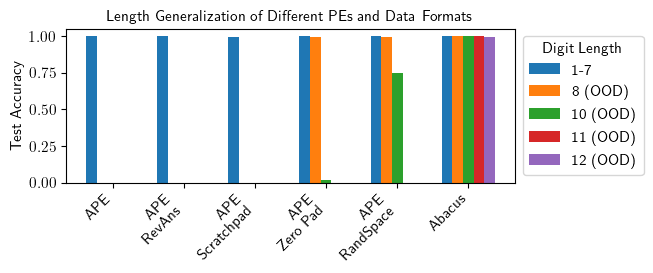

In [7]:
# Data provided
val_acc = {
    "APE": {
        "1-7": 1,
        "8 (OOD)": 0,
        "10 (OOD)": 0,
        "11 (OOD)": 0,
        "12 (OOD)": 0,
    },
    "APE + RevAns": {
        "1-7": 1,
        "8 (OOD)": 0,
        "10 (OOD)": 0,
        "11 (OOD)": 0,
        "12 (OOD)": 0,
    },
    "APE + Scratchpad": {
        "1-7": 0.99,
        "8 (OOD)": 0,
        "10 (OOD)": 0,
        "11 (OOD)": 0,
        "12 (OOD)": 0,
    },
    "APE + Zero Pad": {
        "1-7": 1,
        "8 (OOD)": 0.99,
        "10 (OOD)": 0.02,
        "11 (OOD)": 0,
        "12 (OOD)": 0,
    },
    "APE + RandSpace": {
        "1-7": 1,
        "8 (OOD)": 0.99,
        "10 (OOD)": 0.75,
        "11 (OOD)": 0,
        "12 (OOD)": 0,
    },
    "Abacus": {
        "1-7": 1,
        "8 (OOD)": 1,
        "10 (OOD)": 1,
        "11 (OOD)": 1,
        "12 (OOD)": 0.99,
    },
}

# Prepare data for plotting
models = list(val_acc.keys())
digits = list(val_acc[models[0]].keys())
n_digits = len(digits)
n_models = len(models)

# Create matrix for accuracy values
accuracy_matrix = np.array(
    [[val_acc[model][digit] for digit in digits] for model in models]
)

# Bar plot parameters
bar_width = 0.15
x_indices = np.arange(n_digits)

# Plotting with correct grouping by digits
fig, ax = plt.subplots(figsize=(5.8, 2.0))

x_indices = np.arange(n_models)

for i, digit in enumerate(digits):
    ax.bar(
        x_indices + i * bar_width, accuracy_matrix[:, i], width=bar_width, label=digit
    )

# Set x-ticks and labels
ax.set_xticks(x_indices + bar_width * (n_digits - 1) / 2)
# ax.set_xticklabels(models, rotation=45, ha="right")
ax.set_xticklabels([m.replace(" + ", "\n") for m in models], rotation=45, ha="right")

# Set labels and title
ax.set_ylabel("Test Accuracy")
ax.set_title("Length Generalization of Different PEs and Data Formats")
ax.legend(title="Digit Length", loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("../latex/fig/pe_results.png", dpi=300, bbox_inches="tight")